# Principal Component Analysis (PCA)

This notebook applies PCA for dimensionality reduction while maintaining variance:
1. Load preprocessed data
2. Apply PCA transformation
3. Determine optimal number of components
4. Visualize PCA results
5. Save PCA-transformed data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load preprocessed data
X_train_scaled = pd.read_csv('../data/X_train_scaled.csv')
X_test_scaled = pd.read_csv('../data/X_test_scaled.csv')
y_train = pd.read_csv('../data/y_train.csv').squeeze()
y_test = pd.read_csv('../data/y_test.csv').squeeze()

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Feature names: {list(X_train_scaled.columns)}")


Training data shape: (242, 13)
Test data shape: (61, 13)
Number of features: 13
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [3]:
# Apply PCA with all components to analyze variance
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio for each component:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var_ratio:.4f} ({var_ratio*100:.2f}%)")

print(f"\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"PC1-PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")


Explained Variance Ratio for each component:
PC1: 0.2459 (24.59%)
PC2: 0.1226 (12.26%)
PC3: 0.1006 (10.06%)
PC4: 0.0878 (8.78%)
PC5: 0.0737 (7.37%)
PC6: 0.0701 (7.01%)
PC7: 0.0622 (6.22%)
PC8: 0.0560 (5.60%)
PC9: 0.0516 (5.16%)
PC10: 0.0429 (4.29%)
PC11: 0.0328 (3.28%)
PC12: 0.0304 (3.04%)
PC13: 0.0236 (2.36%)

Cumulative Explained Variance:
PC1-PC1: 0.2459 (24.59%)
PC1-PC2: 0.3685 (36.85%)
PC1-PC3: 0.4690 (46.90%)
PC1-PC4: 0.5568 (55.68%)
PC1-PC5: 0.6305 (63.05%)
PC1-PC6: 0.7006 (70.06%)
PC1-PC7: 0.7628 (76.28%)
PC1-PC8: 0.8188 (81.88%)
PC1-PC9: 0.8704 (87.04%)
PC1-PC10: 0.9133 (91.33%)
PC1-PC11: 0.9461 (94.61%)
PC1-PC12: 0.9764 (97.64%)
PC1-PC13: 1.0000 (100.00%)


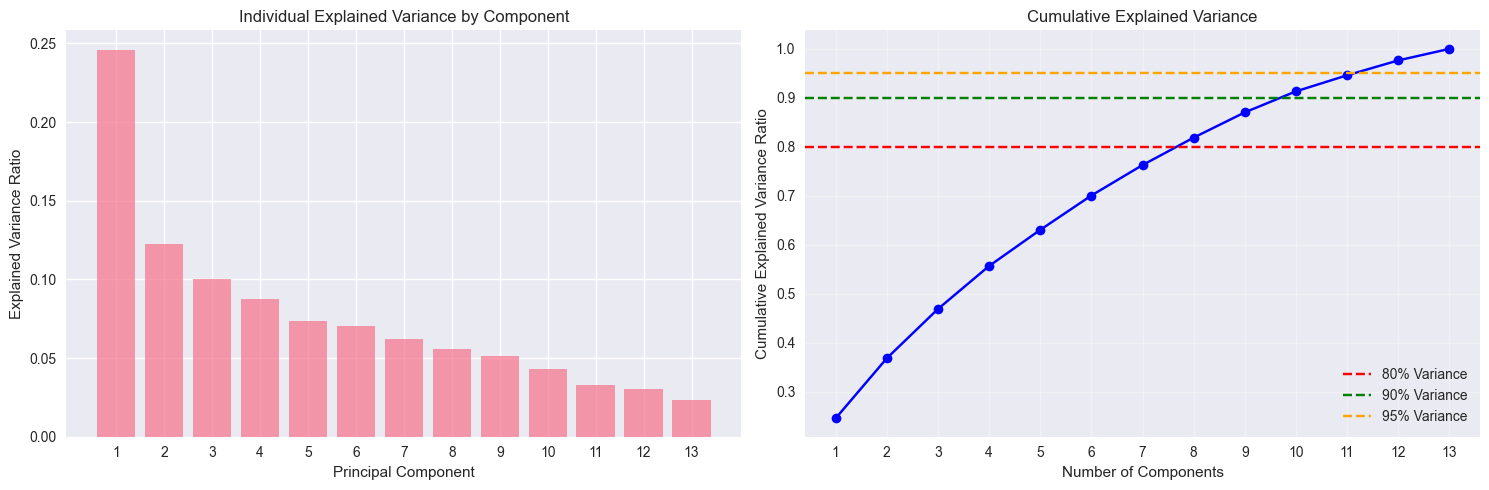

Components needed for 80.0% variance: 8
Components needed for 90.0% variance: 10
Components needed for 95.0% variance: 12


In [4]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Individual explained variance
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Individual Explained Variance by Component')
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% Variance')
ax2.axhline(y=0.95, color='orange', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, len(cumulative_variance_ratio) + 1))

plt.tight_layout()
plt.show()

# Find optimal number of components for different variance thresholds
for threshold in [0.8, 0.9, 0.95]:
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    print(f"Components needed for {threshold*100}% variance: {n_components}")


In [5]:
# Apply PCA with optimal number of components (90% variance)
n_components_optimal = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f"Using {n_components_optimal} components to retain 90% of variance")

pca_optimal = PCA(n_components=n_components_optimal)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"PCA shape: {X_train_pca.shape}")
print(f"Variance retained: {pca_optimal.explained_variance_ratio_.sum():.4f} ({pca_optimal.explained_variance_ratio_.sum()*100:.2f}%)")

# Convert to DataFrames for easier handling
pca_columns = [f'PC{i+1}' for i in range(n_components_optimal)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train_scaled.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test_scaled.index)


Using 10 components to retain 90% of variance
Original shape: (242, 13)
PCA shape: (242, 10)
Variance retained: 0.9133 (91.33%)


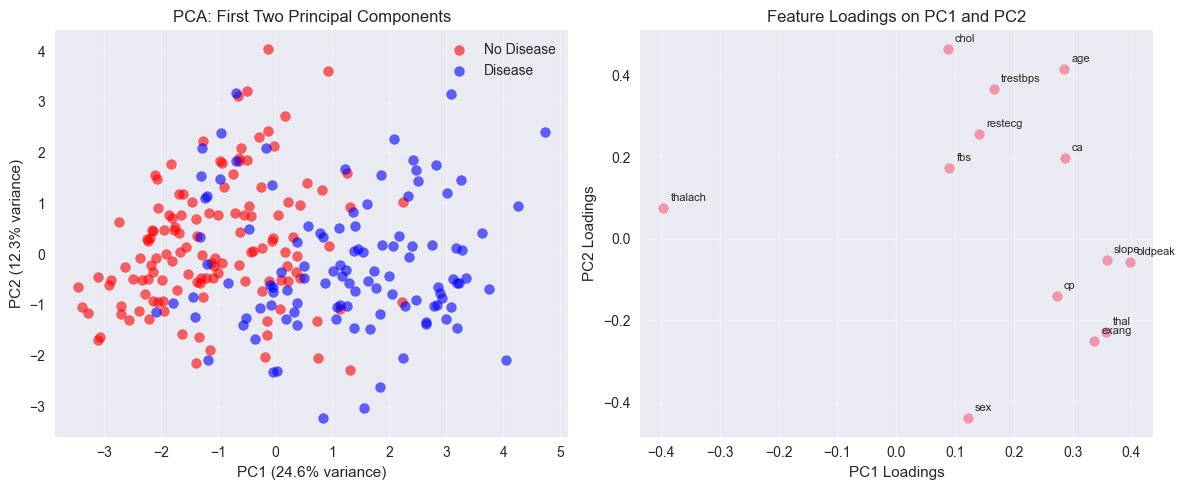

In [6]:
# Visualize PCA results - scatter plot of first two components
plt.figure(figsize=(12, 5))

# 2D scatter plot
plt.subplot(1, 2, 1)
colors = ['red', 'blue']
target_names = ['No Disease', 'Disease']

for target, color, name in zip([0, 1], colors, target_names):
    mask = y_train == target
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
               c=color, label=name, alpha=0.6, s=50)

plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature loadings plot
plt.subplot(1, 2, 2)
loadings = pca_optimal.components_[:2].T
feature_names = X_train_scaled.columns

plt.scatter(loadings[:, 0], loadings[:, 1], alpha=0.7)
for i, feature in enumerate(feature_names):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Feature Loadings on PC1 and PC2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [7]:
# Save PCA results and model
joblib.dump(pca_optimal, '../models/pca_model.pkl')

# Save PCA-transformed datasets
X_train_pca_df.to_csv('../data/X_train_pca.csv', index=False)
X_test_pca_df.to_csv('../data/X_test_pca.csv', index=False)

print("✅ PCA analysis completed!")
print("✅ PCA-transformed datasets saved!")
print("✅ PCA model saved!")
print(f"\nPCA Summary:")
print(f"- Original features: {X_train_scaled.shape[1]}")
print(f"- PCA components: {n_components_optimal}")
print(f"- Variance retained: {pca_optimal.explained_variance_ratio_.sum()*100:.2f}%")
print(f"- Dimensionality reduction: {((X_train_scaled.shape[1] - n_components_optimal) / X_train_scaled.shape[1] * 100):.1f}%")
print("\nFiles saved:")
print("- ../data/X_train_pca.csv, X_test_pca.csv")
print("- ../models/pca_model.pkl")


✅ PCA analysis completed!
✅ PCA-transformed datasets saved!
✅ PCA model saved!

PCA Summary:
- Original features: 13
- PCA components: 10
- Variance retained: 91.33%
- Dimensionality reduction: 23.1%

Files saved:
- ../data/X_train_pca.csv, X_test_pca.csv
- ../models/pca_model.pkl
